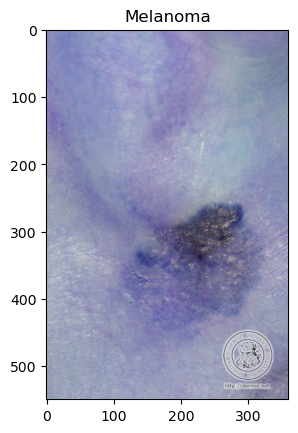

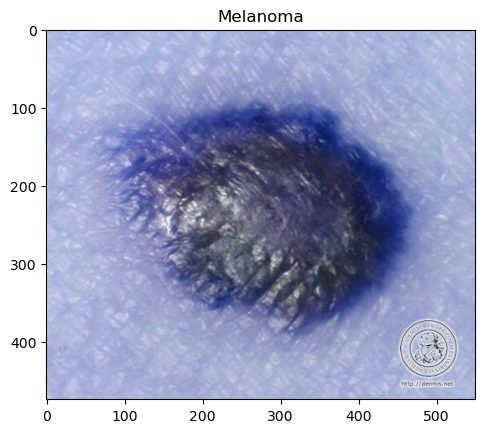

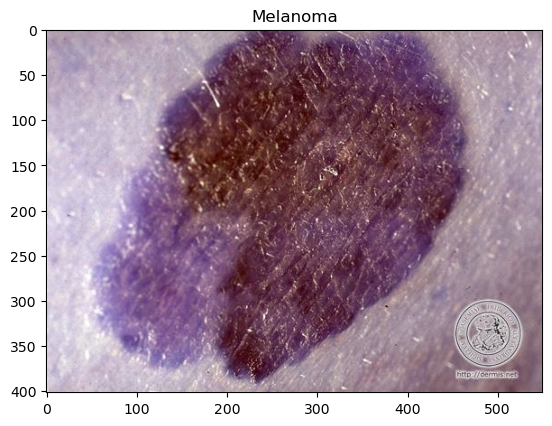

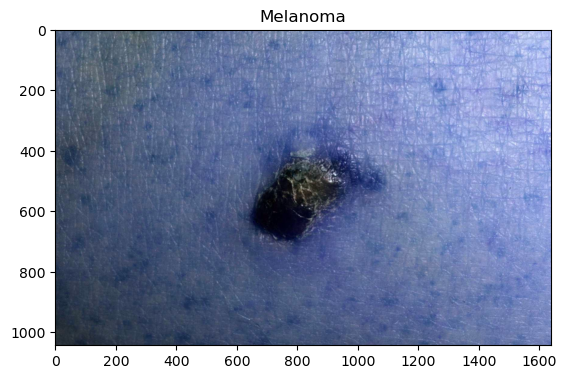

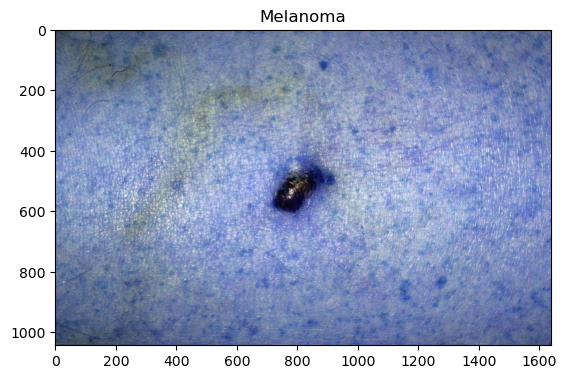

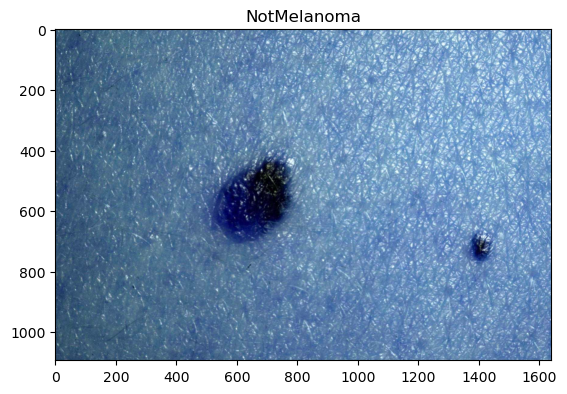

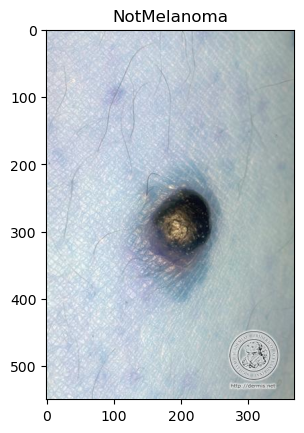

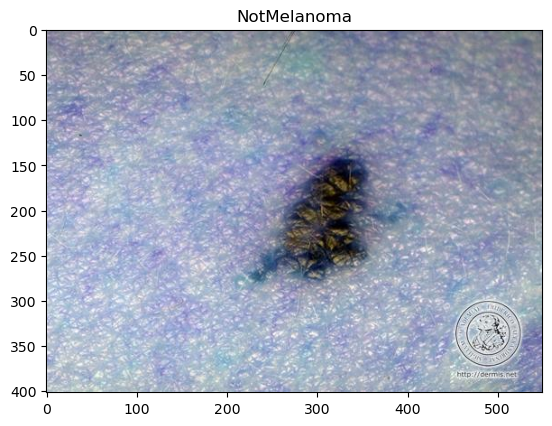

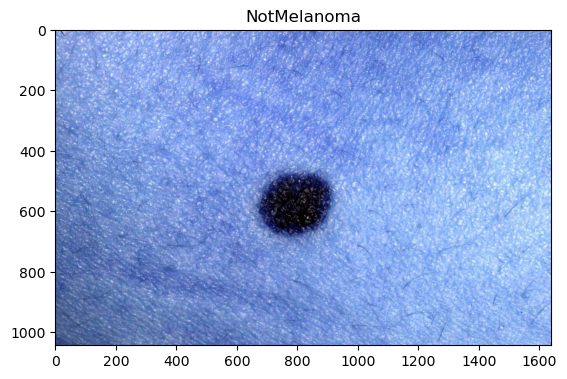

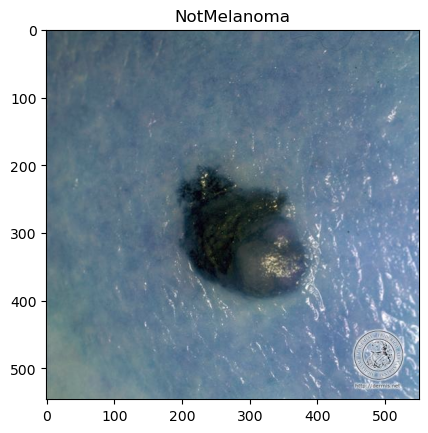

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
import warnings
warnings.filterwarnings("ignore")

DATADIR = r"/Users/san5h0llow/Data_Science/Skin_deases/Dataset/"
CATEGORIES = ["Melanoma","NotMelanoma"]

for i in CATEGORIES:
    path = os.path.join(DATADIR,i)
    j=0
    for img in os.listdir(path):
        img = cv2.imread(os.path.join(path,img))
        plt.imshow(img)
        plt.title(("Melanoma" if i == "Melanoma" else "NotMelanoma"))
        plt.show()
        j+=1
        if j == 5:
            break

In [2]:
IMG_SIZE = 180
training_data = []

def create_training_data():
    for i in CATEGORIES:
        path = os.path.join(DATADIR,i)
        class_num = CATEGORIES.index(i)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
                training_data.append([new_array,class_num])
            except Exception as e:
                pass
create_training_data()

In [3]:
X = []
y = []
for features, label in training_data:
    X.append(features)
    y.append(label)
X = np.array(X).reshape(-1,IMG_SIZE,IMG_SIZE)
print(X.shape)
X = X/255.0
X = X.reshape(-1,180,180,1)

(180, 180, 180)


In [4]:
from tensorflow.keras.utils import to_categorical
y = to_categorical(y, num_classes = 2)

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(X,y,test_size = 0.2, random_state=42,shuffle=True)

In [6]:
print("X_train shape",X_train.shape)
print("X_test shape",X_val.shape)
print("y_train shape",Y_train.shape)
print("y_test shape",Y_val.shape)

X_train shape (144, 180, 180, 1)
X_test shape (36, 180, 180, 1)
y_train shape (144, 2)
y_test shape (36, 2)


In [7]:
from sklearn.metrics import confusion_matrix
import itertools

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau


model = Sequential()

model.add(Conv2D(16,3,3,padding="Same",activation = "relu",input_shape=(180,180,1)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(32,3,3,padding="Same",activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(64,3,3,padding ="Same",activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.3))


model.add(Flatten())
model.add(Dense(96,activation = "relu"))
model.add(Dropout(0.25))
model.add(Dense(2,activation = "softmax"))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 60, 60, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2  (None, 30, 30, 16)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 30, 30, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 32)          0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 5, 5, 32)          0

In [9]:
optimizer = Adam(learning_rate=0.001, beta_1 = 0.9, beta_2=0.999)
model.compile(optimizer = optimizer, loss = "categorical_crossentropy",metrics=["accuracy"])

epochs = 100
batch_size = 40
datagen = ImageDataGenerator(
            rotation_range=15,
            zoom_range=0.1,
            width_shift_range=0.1,
            height_shift_range=0.1,
            horizontal_flip=True,
            vertical_flip=True)

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 60, 60, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2  (None, 30, 30, 16)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 30, 30, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 32)          0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 5, 5, 32)          0

In [11]:
hist = model.fit(X_train, Y_train, validation_data=(X_val, Y_val), epochs=100, verbose=0)

In [12]:
print(hist.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [13]:
print(hist.history['loss'])
print(hist.history['accuracy'])
print(hist.history['val_loss'])
print(hist.history['val_accuracy'])

[0.7055009603500366, 0.6889216899871826, 0.6922597885131836, 0.6917225122451782, 0.6953696608543396, 0.6937091946601868, 0.6864842772483826, 0.6968570947647095, 0.7021933794021606, 0.6997954845428467, 0.6886674165725708, 0.7015187740325928, 0.6924825310707092, 0.6926519870758057, 0.6877688765525818, 0.6915863752365112, 0.691389799118042, 0.6890507936477661, 0.6860615015029907, 0.6948351263999939, 0.686457633972168, 0.6926809549331665, 0.6898958683013916, 0.6935646533966064, 0.6813551783561707, 0.690480649471283, 0.6870502829551697, 0.6835304498672485, 0.6890120506286621, 0.6809881329536438, 0.6938790082931519, 0.6894454956054688, 0.6887855529785156, 0.6914633512496948, 0.6839287877082825, 0.681517481803894, 0.6916901469230652, 0.6826016902923584, 0.6732568740844727, 0.6740455031394958, 0.6834527850151062, 0.6632215976715088, 0.6779404878616333, 0.655717134475708, 0.6509490609169006, 0.6532695293426514, 0.6563493609428406, 0.6384000778198242, 0.6275243163108826, 0.6087938547134399, 0.62

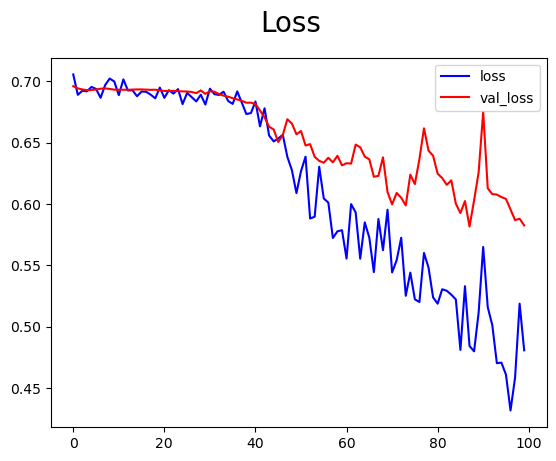

In [14]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='blue', label='loss')
plt.plot(hist.history['val_loss'], color='red', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper right")
plt.show()

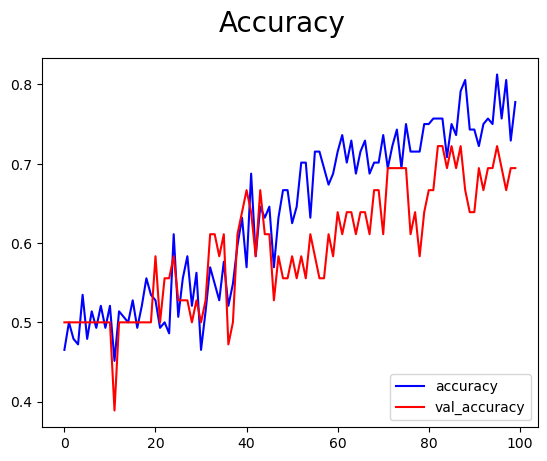

In [15]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='blue', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='red', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="lower right")
plt.show()

In [16]:
model.save("modelADAMOpt.h5")

In [17]:
from keras import models
model = models.load_model("modelADAMOpt.h5")

In [18]:
y_pred = model.predict(X_val)

2/2 [==============================] - 0s 5ms/step


In [19]:
import seaborn as sns
Y_pred_classes = np.argmax(y_pred,axis = 1) 
print(Y_pred_classes)
# Convert validation observations to one hot vectors
Y_true = np.argmax(Y_val,axis = 1) 

[0 0 1 1 1 0 0 1 1 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 0 1 0 1 0 1 1 0 1 1 0 0]


In [20]:
Y_true = np.argmax(Y_val,axis = 1) 
print(Y_true)

[0 0 1 0 1 0 0 0 1 1 1 1 0 1 0 0 0 1 1 0 1 1 1 0 0 1 0 0 1 1 1 0 1 1 0 0]


In [21]:
print(Y_val[:20])

[[1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]]


In [22]:
from sklearn.metrics import classification_report
print(classification_report(Y_true,Y_pred_classes))

              precision    recall  f1-score   support

           0       0.73      0.61      0.67        18
           1       0.67      0.78      0.72        18

    accuracy                           0.69        36
   macro avg       0.70      0.69      0.69        36
weighted avg       0.70      0.69      0.69        36



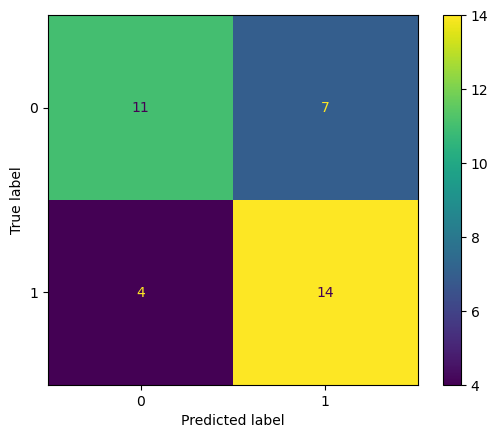

In [23]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(Y_true,Y_pred_classes)